# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D, AveragePooling2D
from keras.utils import plot_model
import os

# Import MNIST

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the input

In [26]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
print(x_train.shape)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
print(x_test.shape)
x_train = x_train/255
x_test  = x_test/255
x_train = x_train.astype('float')
x_test  = x_test.astype('float')

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Increase size of images from 28x28 to 32x32


In [27]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2), (0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2), (0,0)), 'constant')

print("Updated Image Shape: {}".format(x_train.shape))

Updated Image Shape: (60000, 32, 32, 1)


# Implement LeNet

In [0]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(GlobalAveragePooling2D())
#model.add(Flatten())

#model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=10, activation='relu'))

#model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

#Fit Model

In [41]:
model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(x_train,y_train,batch_size=32,epochs=5,validation_split=0.1,shuffle=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_7 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_8 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

#Run model on test data

In [32]:
score = model.evaluate(x_test, y_test, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])
model.summary()

Test score:  0.8052295842170716
Test accuracy:  0.7516
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_5 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_6 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 1,110
Trainable params: 1,110
Non-trainable params:

## Context Activation Mapping

In [33]:
from keras.models import Model
import scipy as sp
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(16, 10)

In [0]:
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))

In [35]:
cam_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6_input (InputLayer)  (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_5 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_6 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170 

In [37]:
features,results = cam_model.predict(x_test)
features.shape

(10000, 6, 6, 16)

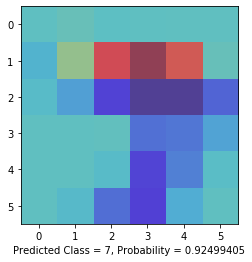

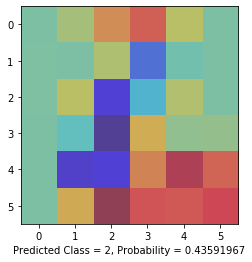

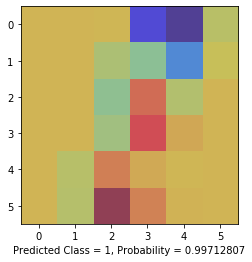

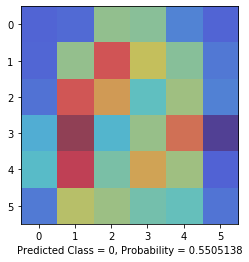

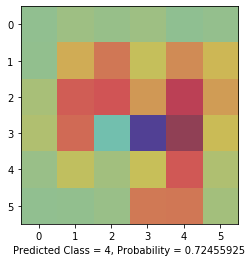

In [39]:
for idx in range(5):
  features_for_one_img = features[idx,:,:,:]
  pred = np.argmax(results[idx])
  cam_features = features_for_one_img
    
    
  plt.figure(facecolor='white')
  cam_weights = gap_weights[:,pred]
  cam_output  = np.dot(cam_features,cam_weights)

  buf = 'Predicted Class = ' +str( pred )+ ', Probability = ' + str(results[idx][pred])
  plt.xlabel(buf)

  plt.imshow(np.squeeze(x_test[idx],-1), alpha=0.5)

  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.show()